**Loading necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading dataset**

In [2]:
supply_data = pd.read_csv("supply_chain_data.csv")

**Summarization of Data to understand Dataset**

In [3]:
supply_data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [4]:
supply_data.shape

(100, 24)

In [5]:
supply_data.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [6]:
supply_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

**Data Visualization**

Products

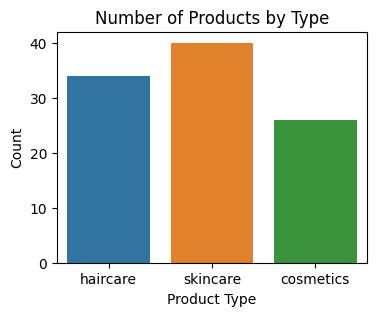

In [7]:
plt.figure(figsize=(4,3))
sns.countplot(data=supply_data, x='Product type')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.title('Number of Products by Type')
plt.show()

Number of products sold

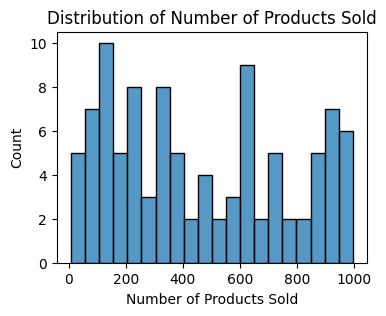

In [8]:
plt.figure(figsize=(4,3))
sns.histplot(data=supply_data, x='Number of products sold', bins=20)
plt.xlabel('Number of Products Sold')
plt.ylabel('Count')
plt.title('Distribution of Number of Products Sold')
plt.show()

Customer Demographics

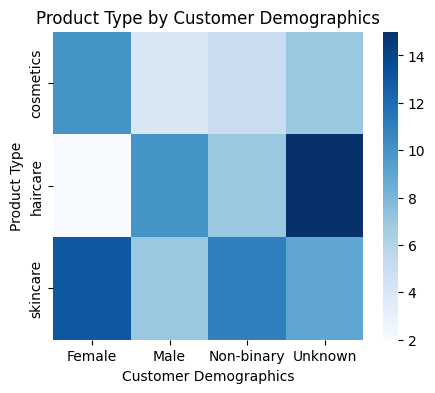

In [9]:
plt.figure(figsize=(5,4))
sns.heatmap(pd.crosstab(supply_data['Product type'], supply_data['Customer demographics']), cmap='Blues')
plt.xlabel('Customer Demographics')
plt.ylabel('Product Type')
plt.title('Product Type by Customer Demographics')
plt.show()

Top suppliers by revenue

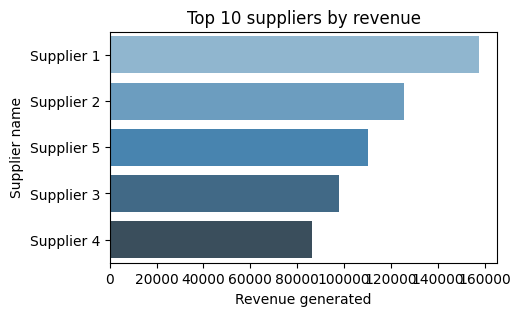

In [10]:
plt.figure(figsize=(5,3))
top_suppliers = supply_data.groupby('Supplier name')['Revenue generated'].sum().nlargest(10)
sns.barplot(x=top_suppliers.values, y=top_suppliers.index, palette='Blues_d')
plt.xlabel('Revenue generated')
plt.ylabel('Supplier name')
plt.title('Top 10 suppliers by revenue')
plt.show()

Product Prices

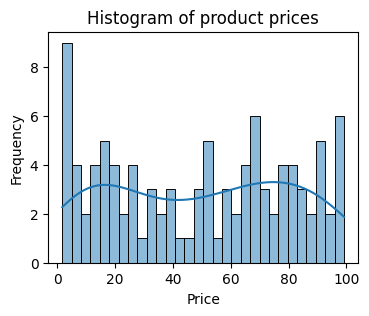

In [11]:
plt.figure(figsize=(4,3))
sns.histplot(data=supply_data, x='Price', kde=True, bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of product prices')
plt.show()

Shipping Costs

Text(0.5, 1.0, 'Shipping Costs by Transportation Mode')

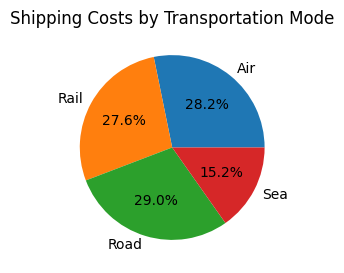

In [12]:
transportation_costs = supply_data.groupby('Transportation modes')['Shipping costs'].sum()
plt.figure(figsize=(4,3))
plt.pie(transportation_costs, labels=transportation_costs.index, autopct='%1.1f%%')
plt.title('Shipping Costs by Transportation Mode')

**Data Preprocessing Techniques**


Checking for missing values

In [13]:
missing_values = supply_data.isnull().sum()
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    print("Columns with missing values:")
    for column, count in missing_values.items():
        print(f"{column}: {count} missing values")
else:
    print("There are no columns with missing value")

There are no columns with missing value


Check for duplicate data

In [14]:
if supply_data.duplicated().any():
    print(f"There are as many as {supply_data.duplicated().sum()} duplicate data.")
else:
    print("There are no duplicate data.")

There are no duplicate data.


**Detailes Analysis**


Quality control check

In [15]:
import plotly.express as px

defect_rates_by_product = supply_data.groupby("Product type")['Defect rates'].mean().reset_index()

# Create a bar chart using Plotly
fig = px.bar(defect_rates_by_product, x='Product type', y='Defect rates', title='Defect Rates by Product Type',width=400,height=400)
fig.update_traces(width=0.5)

# Customize the color scale for bars
color_scale = px.colors.qualitative.Set3
fig.update_traces(marker_color=color_scale)

# Customize the appearance of the chart
fig.update_layout(
    xaxis_title="Product Type",
    yaxis_title="Mean Defect Rates",
    xaxis=dict(categoryorder='total descending'),
    yaxis=dict(title='Mean Defect Rates'),
    plot_bgcolor='white',
    title_x=0.5,
    showlegend=True  # Hide the legend
)
fig.show()

Supply chain risk assessment

In [16]:
risk_data = supply_data[['SKU', 'Lead times', 'Stock levels']]
risk_data.head()

,SKU,Lead times,Stock levels
0,SKU0,7,58
1,SKU1,30,53
2,SKU2,10,1
3,SKU3,13,23
4,SKU4,3,5


In [17]:
risk_data['Risk score'] = risk_data['Lead times'] * (1-risk_data.loc[:,'Stock levels'])


<ipython-input-17-fb559bae5954>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
# Sort the risk_data by 'Risk score' in descending order and select top 10 highest-risk data
risk_data = risk_data.sort_values(by='Risk score', ascending=False)[:10]

# Create a bar plot using Plotly Express
fig = px.bar(risk_data, x='SKU', y='Risk score', title='Top 10 Highest-Risk Data',
             labels={'Risk score': 'Risk Score', 'SKU': 'SKU'},
             text='Risk score')

# Customize the appearance of the plot
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(xaxis_title='SKU', yaxis_title='Risk Score', title_x=0.5)

# Show the plot
fig.show()

Inventory Optimization Analysis with EOQ

In [19]:
holdingcost = 0.2

In [20]:
import numpy as np

def calculate_eoq(data):
    S = data['Costs']
    D = data['Number of products sold']
    H = data['Number of products sold'] * holdingcost
    EOQ = np.sqrt((2*S*D)/H)
    return round(EOQ)

In [21]:
supply_data['EOQ'] = calculate_eoq(supply_data)

In [22]:
comparison_columns = supply_data[['SKU', 'EOQ','Order quantities']]
comparison_columns.head()

,SKU,EOQ,Order quantities
0,SKU0,43.0,96
1,SKU1,71.0,37
2,SKU2,38.0,88
3,SKU3,50.0,59
4,SKU4,96.0,56


In [23]:
# Extracting the top 10 rows for comparison
top_10_comparison = comparison_columns.head(10)

# Creating a bar plot to compare EOQ and Order Quantities for the top 10 SKUs
fig = px.bar(top_10_comparison, x='SKU', y=['EOQ', 'Order quantities'],
             title='Comparison of EOQ and Order Quantities for Top 10 SKUs')

fig.update_layout(
    title_x=0.5
)

# Displaying the plot
fig.show()

Transportation Analysis

In [24]:
avg_lead_times_transport = supply_data.groupby(['Transportation modes'])['Lead times'].mean().reset_index()

fig = px.bar(avg_lead_times_transport, x='Transportation modes', y='Lead times',
             labels={'Transportation modes': 'Transportation Mode', 'Lead times': 'Average Lead Time'},
             title='Average Lead Times by Transportation Mode',width=600)

color_scale = px.colors.qualitative.Set3
fig.update_traces(marker_color=color_scale)

fig.update_layout(
    title=dict(text='Average Lead Times by Transportation Mode', x=0.5),
    xaxis_title='Transportation Mode',
    yaxis_title='Average Lead Time',
    xaxis_tickangle=-45,
    font=dict(family="Arial", size=14),
    showlegend=False
)

# Show the plot
fig.show()

In [25]:
best_transportation_mode = avg_lead_times_transport.loc[avg_lead_times_transport['Lead times'].idxmin()]
best_transportation_mode

Transportation modes          Sea
Lead times              12.176471
Name: 3, dtype: object

**HYPOTHESIS TESTING**

H0: There is no significant reduction in lead times after implementing the supply chain visibility tool.<br>
H1: There is a significant reduction in lead times after implementing the supply chain visibility tool.


2.4360728808302717e-35
The reduction in lead times is statistically significant.


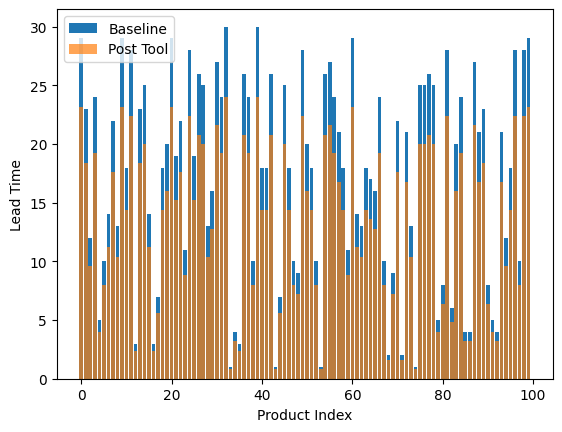

In [26]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
df = pd.read_csv('supply_chain_data.csv')
lead_time_metric = 'Lead time'
baseline_lead_times = df[lead_time_metric]

# Implement Supply Chain Visibility Tool
df['Lead time_post_tool'] = df[lead_time_metric] * 0.8  # Hypothetical 20% reduction in lead times

# Statistical Analysis - t-test
t_stat, p_value = stats.ttest_rel(baseline_lead_times, df['Lead time_post_tool'])
print(p_value)
# Check if the p-value is significant
if p_value < 0.05:
    print("The reduction in lead times is statistically significant.")
else:
    print("No statistically significant reduction in lead times observed.")

# Visualize the Results
plt.bar(df.index, baseline_lead_times, label='Baseline')
plt.bar(df.index, df['Lead time_post_tool'], label='Post Tool', alpha=0.7)

# Add labels and legend
plt.xlabel('Product Index')
plt.ylabel('Lead Time')
plt.legend()

# Show the plot
plt.show()



H0: Implementing demand forecasting algorithms does not lead to a significant improvement in inventory management.<br>
H1: Implementing demand forecasting algorithms leads to a significant improvement in inventory management.

In [27]:

stock_levels_metric = 'Stock levels'
stockouts_metric = 'Defect rates'
overstock_metric = 'Transportation modes'
forecast_metric = 'Demand_Forecast'

# Baseline Data Collection
baseline_stock_levels = df[stock_levels_metric]
baseline_stockouts = df[stockouts_metric]

# Implement Demand Forecasting Algorithms
# Assuming you have a new column named 'Forecast_Algorithm' with 1 for 'Before' and 2 for 'After' implementation
df['Forecast_Algorithm'] = df['Defect rates'].apply(lambda x: 'Before' if x == 'Pending' else 'After')

# Statistical Analysis - t-test for Stock Levels
t_stat_stock_levels, p_value_stock_levels = stats.ttest_ind(
    df[df['Forecast_Algorithm'] == 'Before'][stock_levels_metric],
    df[df['Forecast_Algorithm'] == 'After'][stock_levels_metric]
)


# Statistical Analysis - Chi-squared test for Stockouts
chi2, p_value_stockouts = stats.chisquare(
    [df[df['Forecast_Algorithm'] == 'Before'][stockouts_metric].sum(),
     df[df['Forecast_Algorithm'] == 'After'][stockouts_metric].sum()]
)
print(p_value)
# Check if the p-value is significant for Stockouts
if p_value_stockouts < 0.05:
    print("There is a significant difference in stockouts after implementing demand forecasting algorithms.")
else:
    print("No significant difference observed in stockouts.")

# Analyze Transportation Modes
cross_tab = pd.crosstab(df['Forecast_Algorithm'], df[overstock_metric])
chi2, p_value_overstock, _, _ = stats.chi2_contingency(cross_tab)
print(p_value_overstock)
# Check if the p-value is significant for Transportation Modes
if p_value_overstock < 0.05:
    print("There is a significant difference in transportation modes after implementing demand forecasting algorithms.")
else:
    print("No significant difference observed in transportation modes.")


2.4360728808302717e-35
There is a significant difference in stockouts after implementing demand forecasting algorithms.
1.0
No significant difference observed in transportation modes.


**Supplier Lead Time Affects Product Availability**<br>
Null Hypothesis (H0):
There is no significant difference in product availability between suppliers with short lead times and suppliers with long lead times.<br>
Alternate Hypothesis (H1):
There is a significant difference in product availability between suppliers with short lead times and suppliers with long lead times.

In [28]:

# Define the metrics for supplier lead time analysis
product_availability_metric = 'Availability'
supplier_lead_time_metric = 'Lead times'

# Baseline Data Collection
baseline_availability = df[df[supplier_lead_time_metric] == 'Short'][product_availability_metric]

# Implement Lead Time Optimization
# Assuming 'Long' indicates the longer lead time
df['Supplier_Optimization'] = df[supplier_lead_time_metric].apply(lambda x: 'Short' if x <= 10 else 'Long')

# Statistical Analysis - t-test for Product Availability
t_stat_availability, p_value_availability = stats.ttest_ind(
    baseline_availability,
    df[df['Supplier_Optimization'] == 'Long'][product_availability_metric],
    nan_policy='omit'
)
# Check if the p-value is significant for Product Availability
if p_value_availability < 0.05:
    print("No significant difference observed in product availability with varying supplier lead times.")
else:
    print("There is a significant difference in product availability with varying supplier lead times.")

There is a significant difference in product availability with varying supplier lead times.


**Customer Demographics Impact Product Preferences**<br>
Null Hypothesis (H0):
Understanding customer demographics has no impact on product preferences; there is no difference in product sales and customer satisfaction based on different customer demographics.<br>
Alternative Hypothesis (H1):
Understanding customer demographics does impact product preferences; there is a significant difference in product sales and customer satisfaction based on different customer demographics.

In [33]:
# Define the metrics for customer demographics analysis
product_sales_metric = 'Number of products sold'
customer_satisfaction_metric = 'Customer satisfaction'

# Example customer demographics categories (replace with your actual columns)
customer_demographics_category = 'Customer demographics'

# Check unique values in the customer demographics category
unique_demographics = df[customer_demographics_category].unique()

# Perform statistical tests for each customer demographics category
for demographic_category in unique_demographics:
    # Baseline Data Collection
    baseline_sales = df[df[customer_demographics_category] == demographic_category][product_sales_metric]

    # Statistical Analysis - t-test for Product Sales
    t_stat_sales, p_value_sales = stats.ttest_ind(
        baseline_sales,
        df[df[customer_demographics_category] != demographic_category][product_sales_metric],
        nan_policy='omit'
    )

    # Check if the p-value is significant for Product Sales
    if p_value_sales < 0.05:
        print(f"No significant difference in product sales based on {customer_demographics_category} ({demographic_category}).")
    else:
        print(f"There is a significant difference in product sales based on {customer_demographics_category} ({demographic_category}).")

    # Example: Perform similar tests for customer satisfaction if available
    if 'Customer satisfaction' in df.columns:
        baseline_satisfaction = df[df[customer_demographics_category] == demographic_category][customer_satisfaction_metric]

        # Statistical Analysis - t-test for Customer Satisfaction
        t_stat_satisfaction, p_value_satisfaction = stats.ttest_ind(
            baseline_satisfaction,
            df[df[customer_demographics_category] != demographic_category][customer_satisfaction_metric],
            nan_policy='omit'
        )

There is a significant difference in product sales based on Customer demographics (Non-binary).
There is a significant difference in product sales based on Customer demographics (Female).
There is a significant difference in product sales based on Customer demographics (Unknown).
There is a significant difference in product sales based on Customer demographics (Male).
